# Airbnb Analysis Project

Aim: To analyse prices and expected earnings from airbnb rental properties


In [824]:
# Import the libraries required
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [825]:
listings_data2 = pd.read_csv("sydney/oct15/listings2.csv", )
#listings_data2.head(2)

In [826]:
#clean the data   - need to remove:  amenities  'amenities' ,

listings_data2_clean = listings_data2.drop([ 'neighbourhood_group_cleansed', 'listing_url', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'state', 'market', 'smart_location', 'country_code', 'country', 'square_feet', 'security_deposit', 'cleaning_fee', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'require_guest_profile_picture', 'require_guest_phone_verification', 'scrape_id', 'last_scraped' , 'name', 'summary' , 'space' , 'description' , 'experiences_offered' , 'neighborhood_overview' , 'notes' , 'transit' , 'thumbnail_url' , 'medium_url' , 'picture_url' , 'xl_picture_url' , 'host_id' , 'host_url' , 'host_name' , 'host_since' , 'host_location' , 'host_about'], 1)

# Remove horrible pricing format
listings_data2_clean['price'] = listings_data2_clean['price'].str.replace('$', '').str.replace(',', '').str.rstrip('00').str.rstrip('.')
listings_data2_clean['weekly_price'] = listings_data2_clean['weekly_price'].str.replace('$', '').str.replace(',', '').str.rstrip('00').str.rstrip('.')
listings_data2_clean['monthly_price'] = listings_data2_clean['monthly_price'].str.replace('$', '').str.replace(',', '').str.rstrip('00').str.rstrip('.')
listings_data2_clean['extra_people'] = listings_data2_clean['extra_people'].str.replace('$', '').str.replace(',', '').str.rstrip('00').str.rstrip('.')

# converts strings to int
listings_data2_clean['price'] = listings_data2_clean['price'].astype(int)

#gets a list of daily prices times by 7
weekly = listings_data2_clean['price']*int('7')
listings_data2_clean['weekly_price'] = listings_data2_clean['weekly_price'].fillna(weekly).astype(int)

#gets a list of weekly prices times by 30.4 / 7 
monthly = listings_data2_clean['weekly_price']*float('4.34286')
listings_data2_clean['monthly_price'] = listings_data2_clean['monthly_price'].fillna(monthly).astype(int)

# Clean Response Rate
listings_data2_clean['host_response_rate'] = listings_data2_clean['host_response_rate'].str.rstrip('%').fillna(0).astype(int)
listings_data2_clean['host_acceptance_rate'] = listings_data2_clean['host_acceptance_rate'].str.rstrip('%').fillna(0).astype(int)

# Convert T/F into binary
listings_data2_clean['host_is_superhost'] = listings_data2_clean['host_is_superhost'].str.replace('t', '1').str.replace('f', '0').fillna(0).astype(int)
listings_data2_clean['is_location_exact'] = listings_data2_clean['is_location_exact'].str.replace('t', '1').str.replace('f', '0').fillna(0).astype(int)
listings_data2_clean['has_availability'] = listings_data2_clean['has_availability'].str.replace('t', '1').str.replace('f', '0').fillna(0).astype(int)
listings_data2_clean['instant_bookable'] = listings_data2_clean['instant_bookable'].str.replace('t', '1').str.replace('f', '0').fillna(0).astype(int)

#fill na 

listings_data2_clean = listings_data2_clean.fillna(0)

In [827]:
#create dummy variables for dataset
room_dummies = pd.get_dummies(listings_data2_clean.room_type, prefix='Room').iloc[:, 1:]
property_dummies = pd.get_dummies(listings_data2_clean.property_type, prefix='Property').iloc[:, 1:]
cancellation_dummies = pd.get_dummies(listings_data2_clean.cancellation_policy, prefix='Cancellation').iloc[:, 1:]
bed_dummies = pd.get_dummies(listings_data2_clean.bed_type, prefix='Bed').iloc[:, 1:]



In [828]:
#a_pool = [1 for s in listings_data2_clean['amenities'] if 'Pool' in s]


a_tv = listings_data2_clean['amenities'].str.contains('TV').astype(int)
a_aircon = listings_data2_clean['amenities'].str.contains('Air Conditioning').astype(int)
a_pool = listings_data2_clean['amenities'].str.contains('Pool').astype(int)
a_parking = listings_data2_clean['amenities'].str.contains('Free Parking on Premises').astype(int)
a_kitchen = listings_data2_clean['amenities'].str.contains('Kitchen').astype(int)
a_breakfast = listings_data2_clean['amenities'].str.contains('Breakfast').astype(int)
a_washer = listings_data2_clean['amenities'].str.contains('Washer').astype(int)
a_hottub = listings_data2_clean['amenities'].str.contains('Hot Tub').astype(int)
a_spa = listings_data2_clean['amenities'].str.contains('Spa').astype(int)
a_cable = listings_data2_clean['amenities'].str.contains('Cable TV').astype(int)
a_heating = listings_data2_clean['amenities'].str.contains('Heating').astype(int)
a_gym = listings_data2_clean['amenities'].str.contains('Gym').astype(int)
a_pets = listings_data2_clean['amenities'].str.contains('Pets Allowed').astype(int)
a_wheelchair = listings_data2_clean['amenities'].str.contains('Wheelchair Accessible').astype(int)
a_smoking = listings_data2_clean['amenities'].str.contains('Smoking Allowed').astype(int)
a_events = listings_data2_clean['amenities'].str.contains('Suitable for Events').astype(int)
a_family = listings_data2_clean['amenities'].str.contains('Family/Kid Friendly').astype(int)
a_fire = listings_data2_clean['amenities'].str.contains('Indoor Fireplace').astype(int)
a_lift = listings_data2_clean['amenities'].str.contains('Lift in Building').astype(int)



In [829]:
amenities = pd.concat([a_tv, a_aircon, a_pool, a_parking, a_kitchen, a_breakfast, a_washer, a_hottub,
                       a_spa, a_cable, a_heating, a_gym, a_pets, a_wheelchair, a_smoking, a_events,
                       a_family, a_fire, a_lift], axis=1)
amenities.columns = ['TV', 'Air', 'Pool', 'Parking', 'Kitchen', 'Breakfast', 'Washer', 'Hot Tub',
                     'Spa', 'Cable', 'Heating', 'Gym', 'Pets', 'Wheelchair', 'Smoking', 'Events', 'Family', 
                     'Fire', 'Lift']


In [830]:
listings_data2_clean = pd.concat([listings_data2_clean, amenities], axis=1)
#append dummy variables to dataset
listings_data2_clean = pd.concat([listings_data2_clean, room_dummies], axis=1)
listings_data2_clean = pd.concat([listings_data2_clean, property_dummies], axis=1)
listings_data2_clean = pd.concat([listings_data2_clean, cancellation_dummies], axis=1)
listings_data2_clean = pd.concat([listings_data2_clean, bed_dummies], axis=1)

#new variable for finalised data
listings_data2_final = listings_data2_clean

#list(listings_data2_final)

In [831]:
# create a list of feature columns   - without amenities
feature_cols = ['host_response_rate' , 'host_acceptance_rate' ,  'availability_365'   , 'calculated_host_listings_count' ,
                'reviews_per_month' , 'availability_30' , 'availability_60' , 'availability_90', 'review_scores_rating' , 
                'latitude' , 'longitude' , 'review_scores_accuracy' , 'review_scores_cleanliness' , 'review_scores_checkin' ,
                'review_scores_communication' , 'review_scores_location' , 'review_scores_value' , 'number_of_reviews',  
                'accommodates' , 'bathrooms' , 'bedrooms' , 'beds', 'instant_bookable', 'Room_Private room', 'Room_Shared room',
                'Property_Apartment', 'Property_Bed & Breakfast', 'Property_Boat', 'Property_Bungalow', 'Property_Cabin', 
                'Property_Camper/RV', 'Property_Castle', 'Property_Chalet', 'Property_Condominium', 'Property_Dorm', 
                'Property_Earth House', 'Property_House', 'Property_Island', 'Property_Loft', 'Property_Other', 'Property_Parking Space',
                'Property_Tent', 'Property_Tipi', 'Property_Townhouse', 'Property_Treehouse', 'Property_Villa', 'Cancellation_moderate', 
                'Cancellation_strict', 'Cancellation_super_strict_60', 'Bed_Couch', 'Bed_Futon', 'Bed_Pull-out Sofa', 'Bed_Real Bed',  'TV',
 'Air',
 'Pool',
 'Parking',
 'Kitchen',
 'Breakfast',
 'Washer',
 'Hot Tub',
 'Spa',
 'Cable',
 'Heating',
 'Gym',
 'Pets',
 'Wheelchair',
 'Smoking',
 'Events',
 'Family',
 'Fire',
 'Lift',]




In [832]:
#split variables from prices for regression
y = listings_data2_final['price']
X = listings_data2_final[[ 'host_response_rate' , 'host_acceptance_rate' ,  'availability_365'  , 'calculated_host_listings_count' ,
                          'reviews_per_month' , 'availability_30' , 'availability_60' , 'availability_90', 'review_scores_rating' ,
                          'latitude' , 'longitude' , 'review_scores_accuracy' , 'review_scores_cleanliness' , 'review_scores_checkin' , 
                          'review_scores_communication' , 'review_scores_location' , 'review_scores_value' , 'number_of_reviews', 
                          'accommodates' , 'bathrooms' ,
                          'bedrooms' , 'beds', 'instant_bookable', 'Room_Private room','Room_Shared room', 'Property_Apartment', 
                          'Property_Bed & Breakfast', 'Property_Boat', 'Property_Bungalow', 'Property_Cabin', 'Property_Camper/RV', 
                          'Property_Castle', 'Property_Chalet', 'Property_Condominium', 'Property_Dorm', 'Property_Earth House', 
                          'Property_House', 'Property_Island', 'Property_Loft', 'Property_Other', 'Property_Parking Space',  
                          'Property_Tent', 'Property_Tipi', 'Property_Townhouse', 'Property_Treehouse', 'Property_Villa', 
                          'Cancellation_moderate', 'Cancellation_strict', 'Cancellation_super_strict_60', 'Bed_Couch', 
                          'Bed_Futon', 'Bed_Pull-out Sofa', 'Bed_Real Bed',  'TV',
 'Air',
 'Pool',
 'Parking',
 'Kitchen',
 'Breakfast',
 'Washer',
 'Hot Tub',
 'Spa',
 'Cable',
 'Heating',
 'Gym',
 'Pets',
 'Wheelchair',
 'Smoking',
 'Events',
 'Family',
 'Fire',
 'Lift', ]]


y_reset= y
X_reset=X

In [833]:
# Split test and training data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [566]:
#list(listings_data2_final)

In [636]:
y[341]

60

In [638]:
listings_data2_final.loc[345]

id                                                                        1105656
host_response_time                                             within a few hours
host_response_rate                                                            100
host_acceptance_rate                                                           92
host_is_superhost                                                               0
host_listings_count                                                             1
host_total_listings_count                                                       1
neighbourhood_cleansed                                                   Rockdale
city                                                              Bardwell Valley
zipcode                                                                      2207
latitude                                                                 -33.9351
longitude                                                                 151.138
is_location_exac

# Linear Regression

In [567]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

array([ -4.73813051e-02,  -3.33219807e-01,   7.41762376e-02,
        -1.09020222e-01,   4.51850358e-01,   2.52006339e+00,
        -3.11763446e+00,   1.94923310e+00,   4.15833675e-01,
        -9.52237276e+01,   4.49141626e+02,   1.22044040e+00,
         3.27981950e+00,  -3.60383232e+00,  -8.38628048e-01,
         3.42692172e-01,  -6.65570456e+00,  -1.79370415e-01,
         2.67353154e+01,   6.54513361e+01,   5.57553244e+01,
        -4.66537051e+00,   2.34069874e+01,  -5.04794660e+01,
        -1.34030509e+02,   4.50561140e+01,   4.05005138e+01,
         2.32585044e+03,   3.34792402e+01,   1.44966470e+02,
        -4.70857469e+01,   1.29733630e+03,   1.39874387e+02,
         1.88231321e+01,  -1.76941668e+02,  -9.53060195e+00,
         5.29068223e+01,   7.09377810e+01,   5.12177082e+01,
        -1.02683898e+02,  -1.47863203e+01,   5.75743484e+01,
        -6.87160372e+01,   2.39864865e+01,  -1.15443536e+01,
         6.50918272e+01,   2.61773729e+00,   2.19611478e+01,
         2.68337195e+02,

In [799]:

# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %.4f" % mse)
np.sqrt(metrics.mean_squared_error(y_test, preds))
lm.score(X_test, y_test) 


MSE: 30811.1658


0.53766080684732742

In [569]:
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
print("MSE: %.4f" % mse)
# Is this model better? Why?
rreg.score(X_test, y_test) 




MSE: 31143.3889


0.53267560960197791

In [570]:
preds = rreg.predict(X)
preds = pd.DataFrame(preds)
result = pd.concat([y, preds], axis=1, ignore_index=True)


In [571]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-4, 3)
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
print("MSE: %.4f" % mse)
# What is the range of alp vlues we are searching over?
rregcv.score(X_test, y_test) 

MSE: 33981.1855


0.49009284586535617

In [572]:
#y_test.head(10)

In [573]:
preds[0:10]

array([  78.05859524,   70.14830667,  363.25638044,  119.7072209 ,
        421.4135316 ,  222.02335152,  461.94951194,   90.82520784,
         78.58690338,  146.37940692])

In [574]:
########## Elastic Net Regression Model ##########
# Elastic (alpha must be positive, larger means more regularization)
from sklearn.linear_model import ElasticNet
els = ElasticNet(alpha=0.01, normalize=True)
els.fit(X_train, y_train)
els.coef_
preds = els.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
print("MSE: %.4f" % mse)
els.score(X_test, y_test) 

MSE: 61136.7029


0.082608750409643661

In [575]:
# try a smaller alpha
els = ElasticNet(alpha=0.001, normalize=True)
els.fit(X_train, y_train)
els.coef_
preds = els.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
print("MSE: %.4f" % mse)
els.score(X_test, y_test) 

MSE: 42549.5749


0.3615192537050953

In [576]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import ElasticNetCV
elscv = ElasticNetCV(normalize=True, alphas=alpha_range)
elscv.fit(X_train, y_train)
elscv.alpha_
elscv.coef_
preds = elscv.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
print("MSE: %.4f" % mse)
elscv.score(X_test, y_test) 

MSE: 32051.2139


0.51905317494180914

In [577]:
#SVM Support Vecor Machine ( Not Working!!!)

In [578]:

#from sklearn import svm
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)


In [579]:
#clf.score(X_test, y_test) 

In [580]:
#from sklearn import metrics
#svc = svm.SVC(kernel='linear', C=1)
#cvsvm = cross_validation.cross_val_score(svc, X, y, cv=5)
#scores

# Random Forest

In [803]:
# import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=600, max_features=11, oob_score=True, random_state=1)
rfreg.fit(listings_data2_final[feature_cols], listings_data2_final.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=600, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [804]:
s_rfreg = rfreg.oob_score_
s_rfreg

0.42412822377471793

In [834]:

rfrg = rfreg.fit(X_train, y_train)
Xreg = rfreg.predict(X_test)
Xreg = pd.DataFrame(Xreg)
result = pd.concat([y_test, Xreg], axis=1, ignore_index=True)
mse = mean_squared_error(y, Xreg)
print("MSE: %.4f" % mse)

ValueError: Found arrays with inconsistent numbers of samples: [ 2762 11045]

In [ ]:
s_rfrg = rfreg.score(X_test, y_test) 
s_rfrg

In [ ]:
len(Xreg)

In [835]:
rfrg = RandomForestRegressor(n_estimators=600, max_features=11, oob_score=True, random_state=1)
rfrg = rfrg.fit(X_train, y_train)
y_rfrg = rfrg.predict(X_test)
y_rfrg = pd.DataFrame(y_rfrg)

In [836]:
mse = mean_squared_error(y_test, y_rfrg)
print("MSE: %.4f" % mse)

MSE: 23142.7572


In [837]:
s_rfrg = rfrg.score(X_test, y_test) 
s_rfrg

0.65272967147603222

In [738]:
#feature importance
#pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_})

In [838]:
y_rfrg.loc[342]


0    94.501667
Name: 342, dtype: float64

# Gradient Boosting

In [593]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

###############################################################################
# Load data

X = X.astype(np.float32)

In [598]:



###############################################################################  'latitude' , 'longitude' 'max_features':7,
# Fit regression model
params = {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 25, 'max_features':11, 'random_state':1, 
          'learning_rate': 0.01, 'warm_start':1}
gbst = ensemble.GradientBoostingRegressor(**params)

gbst.fit(X_train, y_train)
mse = mean_squared_error(y_test, gbst.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 22077.5853


In [599]:
s_gbst = gbst.score(X_test, y_test) 
s_gbst

0.66871318578787553

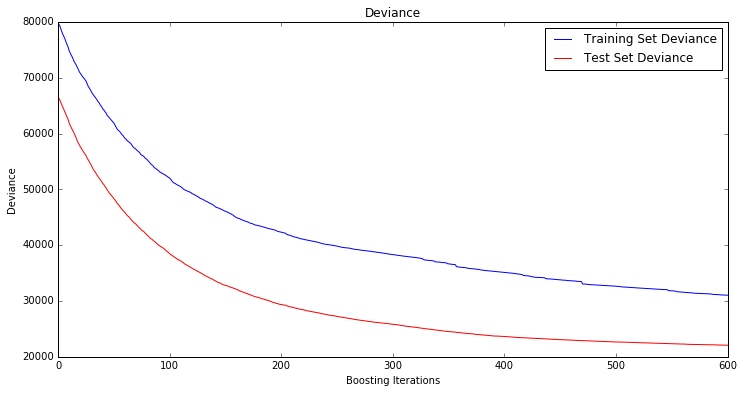

In [600]:

import matplotlib.pyplot as plt

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbst.staged_predict(X_test)):
    test_score[i] = gbst.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbst.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



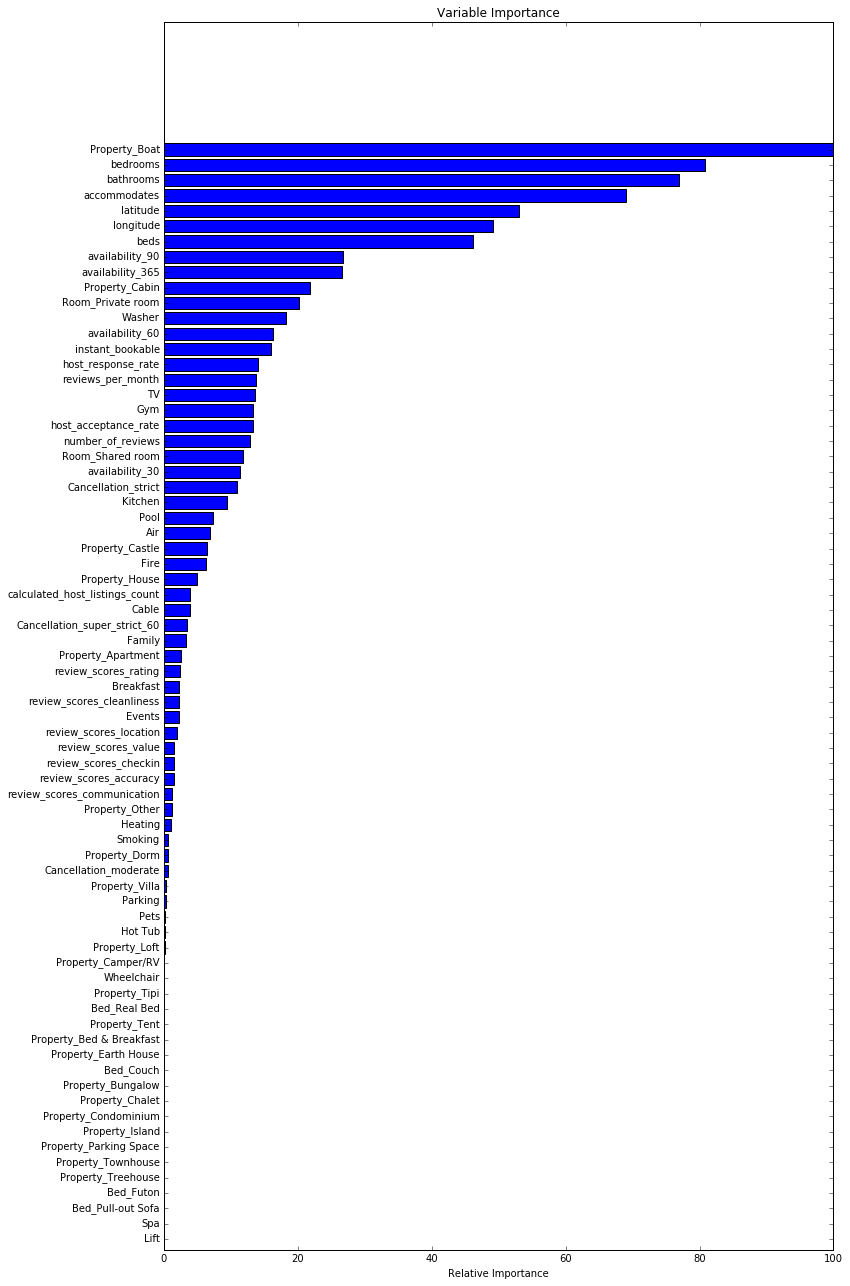

In [601]:
###############################################################################
# Plot feature importance
feature_importance = gbst.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .7
plt.figure(figsize=(12, 22))


plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Gradient Boosting + Kfolds validation

In [816]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split

## y = y.astype(np.float32).as_matrix()

X = X.astype(np.float32).as_matrix()
y = y.astype(np.float32).as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [820]:
# Fit classifier with out-of-bag estimates
params = {'n_estimators': 700, 'max_depth': 4, 'min_samples_split': 5, 'max_features':11, 'random_state':1, 
          'learning_rate': 0.01, 'warm_start':1}
gbkf = ensemble.GradientBoostingRegressor(**params)

gbkf.fit(X_train, y_train)
s_gbkf = gbkf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(s_gbkf))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1
n_estimators

Accuracy: 0.6321


/Users/nishantkumar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



700

In [489]:
def heldout_score(gbkf, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbkf.staged_decision_function(X_test)):
        score[i] = gbkf.loss_(y_test, y_pred)
    return score


def cv_estimate(n_folds=3):
    cv = KFold(n=X_train.shape[0], n_folds=n_folds)
    cv_gbkf = ensemble.GradientBoostingRegressor(**params)
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv:
        cv_gbkf.fit(X_train[train], y_train[train])
        val_scores += heldout_score(cv_gbkf, X_train[test], y_train[test])
    val_scores /= n_folds
    s_cv_gbkf = cv_gbkf.score(X_test, y_test)
    print("Accuracy: {:.4f}".format(s_cv_gbkf))
    return val_scores


# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)
cv_score.head()

/Users/nishantkumar/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning:

Function staged_decision_function is deprecated;  and will be removed in 0.19

/Users/nishantkumar/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning:

Function staged_decision_function is deprecated;  and will be removed in 0.19



Accuracy: 0.6653


/Users/nishantkumar/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning:

Function staged_decision_function is deprecated;  and will be removed in 0.19



AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
n_folds = 3
cv = KFold(n=X_train.shape[0], n_folds=n_folds)
cv_gbkf = ensemble.GradientBoostingRegressor(**params)
val_scores = np.zeros((n_estimators,), dtype=np.float64)
for train, test in cv:
    cv_gbkf.fit(X_train[train], y_train[train])
    val_scores += heldout_score(cv_gbkf, X_train[test], y_train[test])
val_scores /= n_folds
s_cv_gbkf = cv_gbkf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(s_cv_gbkf))

# Model Evaluation

In [775]:
y=y_reset
X=X_reset
# Split test and training data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

y = pd.DataFrame(y_test)
X = pd.DataFrame(X_test)

y_rfrg = rfrg.predict(X_test)
y_gbst = gbst.predict(X_test)
y_gbkf = gbkf.predict(X_test)
#y_cv_gbkf = cv_gbkf.predict(X)

y_avg = np.mean( np.array([y_rfrg, y_gbkf , y_gbst]), axis=0 )

y_rfrg = pd.DataFrame(y_rfrg)
y_gbst = pd.DataFrame(y_gbst)
y_gbkf = pd.DataFrame(y_gbkf)
#y_cv_gbkf = pd.DataFrame(y_cv_gbkf)
y_avg = pd.DataFrame(y_avg)


In [785]:
def y_error(y_err):
    err = (y_err[0] - y_test) 
    err = err / y_test
    return err

err_rfrg = y_error(y_rfrg)
err_gbst = y_error(y_gbst)
err_gbkf = y_error(y_gbkf)
err_avg = y_error(y_avg)


In [786]:
len(y_rfrg[0])

2762

In [787]:
#err_gbst.head(20)

test2 = (y_rfrg[0] - y_test)
test2.head(5)

0       NaN
1       NaN
2       NaN
3       NaN
4    194.22
dtype: float64

In [855]:
test2 = (y_rfrg[0] - y_test)
#test2/y_test

In [789]:


import plotly.plotly as py
import plotly.graph_objs as go

N = len(y_rfrg)
random_x = np.linspace(0, N, N)

py.sign_in('AGuerrera', 'hsjnuzppb5')



# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = err_rfrg,
    mode = 'markers',
    name = 'Random Forest'
)
trace1 = go.Scatter(
    x = random_x,
    y = err_gbst+8,
    mode = 'markers',
    name = 'Gradient Boost'
)

trace2 = go.Scatter(
    x = random_x,
    y = err_gbkf-9,
    mode = 'markers',
    name = 'KFolds'
)
trace3 = go.Scatter(
    x = random_x,
    y = err_avg + 16,
    mode = 'markers',
    name = 'Ensemble'
)



data = [ trace0, trace1, trace2, trace3]

# Plot and embed in ipython notebook!
py.iplot(data, filename='scatter-mode')

PlotlyError: Request throttled. You've created/updated more charts than your allowed limit of 50/day. You may either wait one day or upgrade your account. Visit https://plot.ly/settings/subscription/ to upgrade.

In [790]:

import plotly.plotly as py
import plotly.graph_objs as go

N = len(y_rfrg[0])
random_x = np.linspace(0, N, N)

py.sign_in('AGuerrera', 'hsjnuzppb5')



# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = err_rfrg,
    mode = 'markers',
    name = 'Random Forest'
)

data = [ trace0]

# Plot and embed in ipython notebook!
py.iplot(data, filename='scatter-mode')

PlotlyError: Request throttled. You've created/updated more charts than your allowed limit of 50/day. You may either wait one day or upgrade your account. Visit https://plot.ly/settings/subscription/ to upgrade.

In [758]:
y.head()

,price
7209,55
9313,89
8219,450
1601,50
3729,220


# New Property

In [759]:
result = pd.concat([y,  y_rfrg, y_gbst, y_avg,  y_gbkf], axis=1, ignore_index=True)
#result.head(40)

In [863]:
X_new = X.iloc[10430]
X_new = pd.DataFrame(X_new)
X_new = X_new.isin([7464749])
X_new['accommodates'] = 9
X_new['Property_Apartment'] = 0
X_new['Property_House'] = 1
X_new['bedrooms'] = 9

X_new['bedrooms'] = 9


In [864]:
#X.iloc[10430]

#X_new


In [842]:
X = X_reset
y_pred = rfrg.predict(X)
y_pred = pd.DataFrame(y_pred)


In [850]:
y_pred.iloc[10268]

0    127.726667
Name: 10268, dtype: float64

In [851]:
y_pred.iloc[10430]

0    286.461667
Name: 10430, dtype: float64

In [676]:
#### listings_data2_final.loc[10268].head(50)

#7464749 private balcony fun share room

listings_data2[listings_data2['id'].isin([7464749])]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
10037,7464749,https://www.airbnb.com/rooms/7464749,2.015100e+13,2/10/15,"Private Room, Fun Share House",Perfect central Sydney location. You will be s...,We love our home and have tried to make the mo...,Perfect central Sydney location. You will be s...,none,This is the perfect location in Sydney. Right ...,...,10,f,NaN,NaN,f,moderate,f,f,3,3.04


In [821]:
#X.loc[10037]


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

# Grave Yard - Not Important


In [ ]:
# Compute best n_estimator for test data
test_score = heldout_score(gbkf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(gbkf.estimators_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()

# Alpha Selection

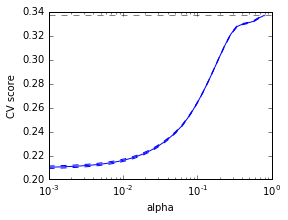

In [146]:
from sklearn import cross_validation, datasets, linear_model
lasso = linear_model.Lasso()
alphas = np.logspace(-3, -0.1, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')



In [148]:
##############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 5)
y = np.array(y)
X = np.array(X)
print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

('Answer to the bonus question:', 'how much can you trust the selection of alpha?')
()
Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.79433, score: 0.35450
[fold 1] alpha: 0.79433, score: 0.56040
[fold 2] alpha: 0.79433, score: 0.58183
[fold 3] alpha: 0.79433, score: 0.27858
[fold 4] alpha: 0.33745, score: 0.09473
()
Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


# XG Boost 

In [ ]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#! pip install --upgrade xgboost

In [ ]:
#import xgboost as xgb
#from sklearn.preprocessing import LabelEncoder
#import numpy as np
#from sklearn.cross_validation import KFold, train_test_split
#from sklearn.metrics import confusion_matrix, mean_squared_error
#from sklearn.grid_search import GridSearchCV

In [ ]:
#gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [ ]:
#predictions = gbm.predict(X_test)


In [ ]:
#err = []
#kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)
#for train_index, test_index in kf:
#    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
#    predictions = xgb_model.predict(X[test_index])
#    actuals = y[test_index]
#    err.append(mean_squared_error(actuals, predictions))
#err


# Kfolds

In [140]:
y = y_reset
X = X_reset

# change to np if needed
X1 = X.astype(np.float32).as_matrix()
y1 = y.astype(np.float32).as_matrix()

#X1 = X.astype(np.float32)
#y1 = y.astype(np.float32)

In [141]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
   
   # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        s_clf = clf.score(X_test, y_test)

        print("Accuracy: {:.4f}".format(s_clf))
    return y_pred

In [142]:

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.neighbors import KNeighborsRegressor as KNN

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred)


In [143]:

print("Random forest:")
print("%.3f" % accuracy(y, run_cv(X1,y,RF)))
print("K-nearest-neighbors:")
print("%.3f" % accuracy(y, run_cv(X1,y,KNN)))

Random forest:
Accuracy: 0.6132
Accuracy: 0.4149
Accuracy: 0.2276
Accuracy: 0.5528
Accuracy: 0.2636
0.003
K-nearest-neighbors:
Accuracy: 0.0846
Accuracy: 0.0463
Accuracy: 0.0142
Accuracy: 0.0091
Accuracy: 0.0706
0.003


/Users/nishantkumar/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/nishantkumar/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3025: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1320702d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130656810>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x136005910>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138abbe90>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x211607110>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2151e2910>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x218bd23d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x21c5bce90>]], dtype=object)

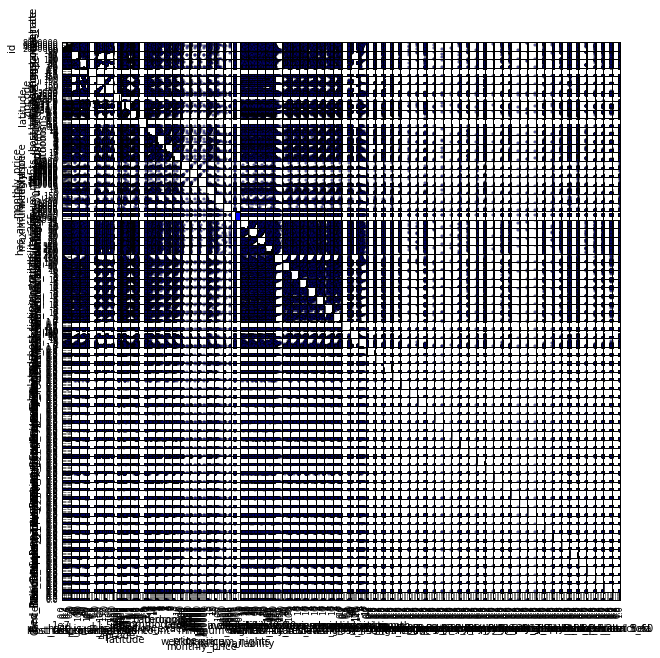

# Listing Visulalisation 

In [ ]:
#install plotly

#! pip install plotly


In [46]:
import plotly
print plotly.__version__  # version >1.9.4 required
from plotly.graph_objs import Scatter, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()

1.9.6


In [47]:
price_map = listings_data2_final[['id',  'price' , 'longitude' ,  'latitude']]

In [53]:
#color pattern
scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

listings = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = price_map['longitude'],
        lat = price_map['latitude'],
        hoverinfo = 'text',
        text = '#' + price_map['id'].astype(str) + ' - $' + price_map['price'].astype(str),
        mode = 'markers',
        marker = dict(
            color = price_map['price'],
            colorscale = scl,
            cmin = 5,
            cmax = 400,
            reversescale = True,
            opacity = 0.7,
            size = 2,        
            colorbar = dict(
                thickness = 10,
                titleside = "right",
                outlinecolor = "rgba(68, 68, 68, 0)",
                ticks = "outside",
                ticklen = 3,
                showticksuffix = "last",
                tickprefix = "$",
                dtick = 0.1
            ),                
        ),
        
       )]


layout = dict(
        title = 'Airbnb Prices in NSW',
        showlegend = False,
        height = 800,
    
        geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ 151.1, 151.35 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -33.95, -33.75 ],
            dtick = 5
        )
        ),
    )

fig = dict( data=listings, layout=layout )

iplot(fig)

# Graveyard

In [ ]:
# for inital work, takes a few minutes, avoid 
#pd.scatter_matrix(listings_data2_clean, figsize=(10,10))

In [ ]:
#Predicted price vs accomodates
#print linreg.predict([1,-33.61,151.28])

#price_pred = linreg.predict(X)
#plt.plot(listings_data2.accommodates, price_pred, color='red')

#plt.scatter(listings_data2.accommodates, listings_data2.price)

# Plot reviews per month vs price

#plt.scatter(listings_data2.reviews_per_month, listings_data2.price)

In [ ]:

#listings_data2_clean['zipcode'] = listings_data2_clean['zipcode']. fillna(0).astype(int)
# Classification Variables

#listings_data2_clean['property_type'] = listings_data2_clean['property_type'].map({'Apartment':1, 'Bed & Breakfast':2, 'Boat':3, 'Bungalow':4, 'Cabin':5, 'Camper/RV':6, 'Castle':7, 'Chalet':8, 'Condominium':9, 'Dorm':10, 'Earth House':11, 'House':12, 'Island':13, 'Loft ':14, 'Other':15, 'Parking Space':16, 'Tent':17, 'Tipi ':18, 'Townhouse':19, 'Treehouse':20, 'Villa':21})
#listings_data2_clean['room_type'] = listings_data2_clean['room_type'].map({'Shared room':1, 'Private room':2, 'Entire home/apt':3})
#listings_data2_clean['cancellation_policy'] = listings_data2_clean['cancellation_policy'].map({'strict':1, 'moderate':2, 'flexible':3})
#listings_data2_clean['bed_type'] = listings_data2_clean['bed_type'].map({'Real Bed':5, 'Pull-out Sofa':4, 'Futon':3, 'Couch':2, 'Airbed':1})
# Cleaning Classification types
#listings_data2_clean['room_type'] = listings_data2_clean['room_type'].fillna(0).astype(int)
#listings_data2_clean['property_type'] = listings_data2_clean['property_type'].fillna(0).astype(int)
#listings_data2_clean['cancellation_policy'] = listings_data2_clean['cancellation_policy'].fillna(0).astype(int)
#listings_data2_clean['bed_type'] = listings_data2_clean['bed_type'].fillna(0).astype(int)
